# **TUBES MACHINE LEARNING**

Contributor
 * **ICHLASUL AMAL**
 * **RIZKYTA SHAINY ANGELINE** 
 
 ***
 
 **Formulasi Masalah:** Terdapat dataset mengenai turunnya salju yang akan dibuat pemodelan untuk memberi label dari data  apakah keesokan harinya akan bersalju atau tidak.

## Preparation

In [1]:
# Import All Package
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Show Info
print('Info All Package version!')
print('Pandas Version : {}'.format(pd.__version__))
print('Numpy Version : {}'.format(np.__version__))
print('Seaborn Version : {}'.format(sns.__version__))

Info All Package version!
Pandas Version : 0.25.1
Numpy Version : 1.16.5
Seaborn Version : 0.9.0


In [2]:
#Check Dataset
print('Datasets :')
datasetSalju = False
datasets = os.listdir('../datasets/')
for dataset in datasets:
    if dataset[-3:] == 'csv':
        if dataset[:5] == 'salju':
            datasetSalju = True
        print('\t', dataset)
if datasetSalju :
    print('\nDataset Salju Available')
else :
    print('Dataset Salju Not Available')

Datasets :
	 salju_test.csv
	 salju_train.csv

Dataset Salju Available


## Start to code!

In [3]:
#Read Dataset
data_train_salju = pd.read_csv('../datasets/salju_train.csv')
data_test_salju = pd.read_csv('../datasets/salju_test.csv')
print("Jumlah data train salju : {}".format(data_train_salju.shape))
print("Jumlah data test salju : {}".format(data_test_salju.shape))

Jumlah data train salju : (109095, 24)
Jumlah data test salju : (18182, 23)


### Data Exploration & Preparation

In [4]:
#  For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.
from pandas.api.types import is_numeric_dtype

data = data_train_salju
for col in data.keys():
  if is_numeric_dtype(data[col]):
    print('%s:' % (col))
    print('\t Mean = %.2f' % data[col].mean())
    print('\t Standard deviation = %.2f' % data[col].std())
    print('\t Minimum = %.2f' % data[col].min())
    print('\t Maximum = %.2f' % data[col].max())
  else:
    print("")
    print('%s:' % (col))
    print(data[col].value_counts())
    print("")


# For the qualitative attribute (class), count the frequency for each of its distinct values.

id:
	 Mean = 54548.00
	 Standard deviation = 31493.16
	 Minimum = 1.00
	 Maximum = 109095.00

Tanggal:
02/06/2017    45
15/08/2014    45
14/09/2016    45
05/12/2013    45
31/03/2017    45
              ..
02/05/2008     1
31/12/2007     1
30/12/2007     1
07/06/2008     1
04/12/2007     1
Name: Tanggal, Length: 3414, dtype: int64


KodeLokasi:
C1     2598
C2     2532
C7     2442
C8     2420
C3     2419
C5     2383
C6     2371
C4     2366
C38    2331
C20    2308
C23    2307
C18    2304
C21    2298
C12    2293
C35    2292
C25    2290
C45    2287
C22    2282
C17    2278
C13    2277
C37    2277
C40    2273
C28    2269
C9     2268
C26    2268
C14    2265
C41    2265
C15    2264
C46    2264
C27    2262
C11    2254
C10    2250
C43    2249
C33    2247
C31    2244
C36    2243
C34    2241
C44    2239
C16    2236
C32    2233
C30    2230
C39    2227
C29    2221
C42    2217
C19    2215
C24    2213
C49    1210
C47    1198
C48    1175
Name: KodeLokasi, dtype: int64

SuhuMin:
	 Mean = 12.20
	 Standard

In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,109095,NaN,NaN,NaN,54548,31493.2,1,27274.5,54548,81821.5,109095
Tanggal,109095,3414,02/06/2017,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KodeLokasi,109095,49,C1,2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SuhuMin,107973,NaN,NaN,NaN,12.1962,6.38942,-8.5,7.6,12,16.8,33.9
SuhuMax,108166,NaN,NaN,NaN,23.2148,7.1066,-4.8,17.9,22.6,28.2,47.3
Hujan,106664,NaN,NaN,NaN,2.38501,8.58815,0,0,0,0.8,371
Penguapan,62071,NaN,NaN,NaN,5.46244,4.20164,0,2.6,4.8,7.4,145
SinarMatahari,56716,NaN,NaN,NaN,7.59953,3.78904,0,4.8,8.4,10.6,14.3
ArahAnginTerkencang,101351,16,W,7491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KecepatanAnginTerkencang,101399,NaN,NaN,NaN,40.032,13.6176,7,31,39,48,135


In [6]:
data_train_salju.keys()

Index(['id', 'Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan',
       'Penguapan', 'SinarMatahari', 'ArahAnginTerkencang',
       'KecepatanAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm',
       'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am',
       'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm',
       'Suhu9am', 'Suhu3pm', 'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')

In [7]:
data_train_salju.corr()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
id,1.000000,0.007520,0.004129,0.001892,-0.002019,-0.003793,-0.003330,0.001467,-0.000819,0.002330,0.002229,-0.004429,-0.004715,0.001144,0.000388,0.006948,0.004265
SuhuMin,0.007520,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.004129,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.001892,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,-0.002019,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,-0.003793,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,-0.003330,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.001467,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,-0.000819,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,0.002330,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840


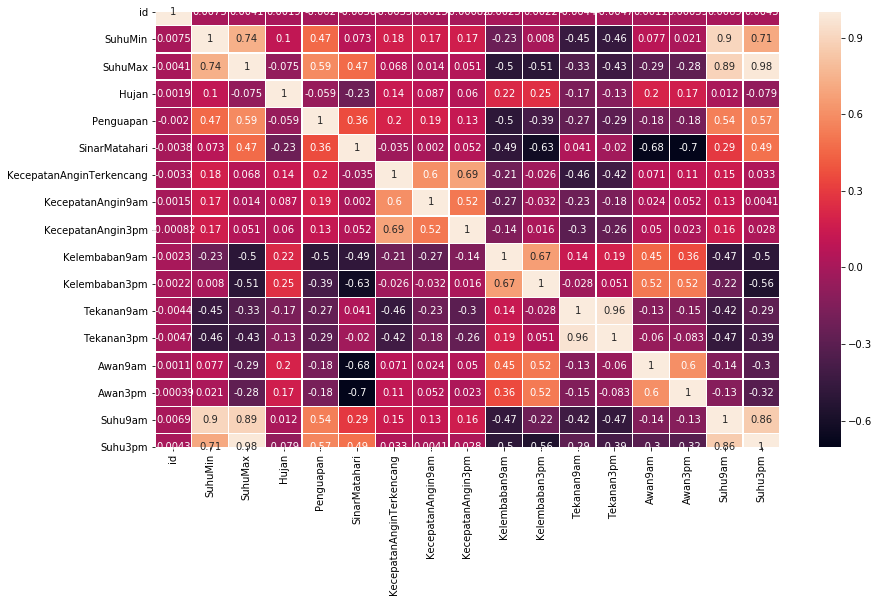

In [8]:
corr = data_train_salju.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, linewidth=0.3)

In [9]:
df = data_train_salju[['SuhuMax', 'SuhuMin', 'BersaljuBesok']]
df

,SuhuMax,SuhuMin,BersaljuBesok
0,15.5,10.4,Tidak
1,17.0,9.0,Ya
2,32.0,18.2,Tidak
3,24.5,7.3,Tidak
4,20.3,5.9,Tidak
...,...,...,...
109090,23.7,20.1,Ya
109091,25.2,15.7,Ya
109092,20.4,7.5,Tidak
109093,29.8,10.8,Tidak


In [10]:
# Preprocessing Data - Check Missing Value
print('Before replacing missing values:')
print(df.isnull().sum())

print('\nAfter replacing missing values:')
df_after_delete_mv = df.fillna(df.median())

print(df_after_delete_mv.isnull().sum())

Before replacing missing values:
SuhuMax           929
SuhuMin          1122
BersaljuBesok    2431
dtype: int64

After replacing missing values:
SuhuMax             0
SuhuMin             0
BersaljuBesok    2431
dtype: int64


(109095, 3)

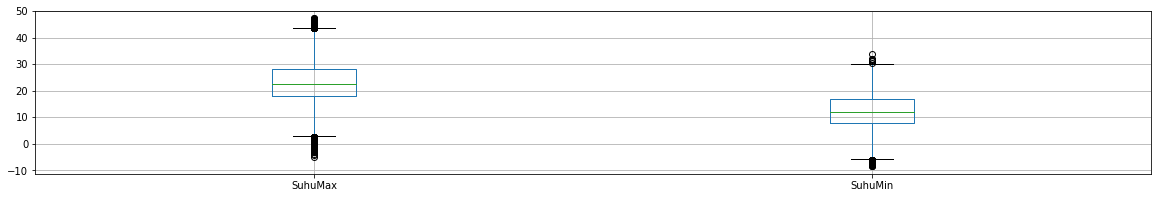

In [11]:
# Preprocessing Data - Check Outlier
df_check_outlier = df_after_delete_mv
df_check_outlier.boxplot(figsize=(20,3))
df_check_outlier.shape

In [12]:
q_low = df_check_outlier["SuhuMax"].quantile(0.01)
q_hi  = df_check_outlier["SuhuMax"].quantile(0.99)

q2_low = df_check_outlier["SuhuMin"].quantile(0.01)
q2_hi  = df_check_outlier["SuhuMin"].quantile(0.99)

print('Nilai Quantile High Suhu Max: {}'.format(q_hi))
print('Nilai Quantile Low Suhu Max: {}'.format(q_low))
print('')
print('Nilai Quantile High Suhu Min: {}'.format(q2_hi))
print('Nilai Quantile Low Suhu Min: {}'.format(q2_low))

Nilai Quantile High Suhu Max: 40.1
Nilai Quantile Low Suhu Max: 9.094000000000005

Nilai Quantile High Suhu Min: 25.7
Nilai Quantile Low Suhu Min: -1.9


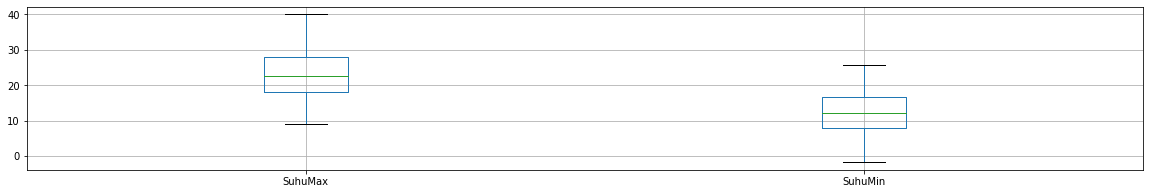

In [13]:
df_rm_outlier = df_check_outlier[(df_check_outlier["SuhuMax"] < q_hi) & (df_check_outlier["SuhuMax"] > q_low) & (df_check_outlier["SuhuMin"] < q2_hi) & (df_check_outlier["SuhuMin"] > q2_low) ]
df_rm_outlier.boxplot(figsize=(20,3))

In [14]:
df_rm_outlier.head()

,SuhuMax,SuhuMin,BersaljuBesok
0,15.5,10.4,Tidak
1,17.0,9.0,Ya
2,32.0,18.2,Tidak
3,24.5,7.3,Tidak
4,20.3,5.9,Tidak


In [15]:
def tran_mathscore(x):
  return 1 if x == 'Ya' else 0

df_rm_outlier['BersaljuBesok'] = df_rm_outlier['BersaljuBesok'].apply(tran_mathscore)
df_rm_outlier

C:\Users\rizkytasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SuhuMax,SuhuMin,BersaljuBesok
0,15.5,10.4,0
1,17.0,9.0,1
2,32.0,18.2,0
3,24.5,7.3,0
4,20.3,5.9,0
...,...,...,...
109090,23.7,20.1,1
109091,25.2,15.7,1
109092,20.4,7.5,0
109093,29.8,10.8,0


In [16]:
new_data_salju = df_rm_outlier
X = new_data_salju.iloc[:,:-1].values  
y = np.array(new_data_salju['BersaljuBesok'])
print('Jumlah data : {}'.format(X.shape))
print('Jumlah target  : {}'.format(y.shape))



Jumlah data : (105259, 2)
Jumlah target  : (105259,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
print(X_train)  
print(y_train)
print(X_test)
print(y_test)

[[22.5 12.3]
 [13.9  9.7]
 [11.3  4. ]
 ...
 [37.5 18.7]
 [33.  12.5]
 [33.2 24.7]]
[0 1 0 ... 0 0 1]
[[ 9.7 -0.9]
 [22.7 10.5]
 [18.2  3.2]
 ...
 [14.1  8.6]
 [26.8 13.7]
 [23.6  8.9]]
[0 0 0 ... 0 0 0]


### Permodelan

In [18]:
# Setelah selesai preprocessing data, Melakukan permodelan
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
KNN_prediction = KNN_model.predict(X_test)
KNN_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Evaluation 

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
# from sklearn.metrics import accuracy_score
# Accuracy score is the simplest way to evaluate
print("Accuracy Score : {} %".format(int(accuracy_score(KNN_prediction, y_test).round(2) * 100)))

# But Confusion Matrix and Classification Report give more details about performance
# from sklearn.metrics import confusion_matrix
print(confusion_matrix(KNN_prediction, y_test))

# from sklearn.metrics import classification_report
print(classification_report(KNN_prediction, y_test))

Accuracy Score : 75 %
[[14444  3267]
 [ 1986  1355]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     17711
           1       0.29      0.41      0.34      3341

    accuracy                           0.75     21052
   macro avg       0.59      0.61      0.59     21052
weighted avg       0.79      0.75      0.77     21052



## Experiment 

### Preparasi

In [37]:
# Encode data pada BersaljuBesok dan BersaljuHariIni agar memiliki tipe data integer
eks_df = data_train_salju.copy()
eks_df['BersaljuBesok'] = (data_train_salju['BersaljuBesok'] == 'Ya').astype(int)
eks_df['BersaljuHariIni'] = (data_train_salju['BersaljuHariIni'] == 'Ya').astype(int)
eks_df.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,1,0
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,1,1
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,0,0
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0


In [38]:
# Cek persentase missing values pada setiap kolom
missing_percentage = (eks_df.isnull().sum() / eks_df.isnull().count()).sort_values()
missing_percentage

id                          0.000000
BersaljuHariIni             0.000000
BersaljuBesok               0.000000
KodeLokasi                  0.000000
Tanggal                     0.000000
SuhuMax                     0.008516
SuhuMin                     0.010285
Suhu9am                     0.012283
KecepatanAngin9am           0.012402
Kelembaban9am               0.018351
KecepatanAngin3pm           0.021110
Hujan                       0.022283
Suhu3pm                     0.024731
ArahAngin3pm                0.029305
Kelembaban3pm               0.030927
KecepatanAnginTerkencang    0.070544
ArahAnginTerkencang         0.070984
ArahAngin9am                0.072625
Tekanan3pm                  0.103653
Tekanan9am                  0.103827
Awan9am                     0.383556
Awan3pm                     0.407636
Penguapan                   0.431037
SinarMatahari               0.480123
dtype: float64

In [39]:
# Mengecek korelasi antara kolom BersaljuBesok dengan kolom lainnya
bersalju_corr = abs(eks_df.corr()['BersaljuBesok']).sort_values()
bersalju_corr

id                          0.002692
Suhu9am                     0.026721
SuhuMin                     0.081813
KecepatanAngin3pm           0.088008
KecepatanAngin9am           0.088646
Penguapan                   0.118658
SuhuMax                     0.158822
Suhu3pm                     0.192587
Tekanan3pm                  0.222901
KecepatanAnginTerkencang    0.230203
Hujan                       0.236878
Tekanan9am                  0.242786
Kelembaban9am               0.253510
BersaljuHariIni             0.307602
Awan9am                     0.316292
Awan3pm                     0.376409
Kelembaban3pm               0.441152
SinarMatahari               0.444537
BersaljuBesok               1.000000
Name: BersaljuBesok, dtype: float64

In [40]:
# Menghapus kolom yang tidak akan digunakan dalam pemodelan
eks_df_drop = eks_df.copy()
#eks_df_drop.drop(['id', 'Tanggal', 'KodeLokasi', 'Penguapan', 'SinarMatahari', 'Awan3pm'], axis=1, inplace=True)
eks_df_drop.drop(['id', 'Tanggal', 'KodeLokasi', 'Penguapan'], axis=1, inplace=True)
eks_df_drop.head()

,SuhuMin,SuhuMax,Hujan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,1,0
1,9.0,17.0,8.0,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,1,1
2,18.2,32.0,0.0,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,0,0
3,7.3,24.5,0.0,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0


In [41]:
#eks_df_encode = pd.get_dummies(data=eks_df_drop,columns=['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'])
#eks_df_encode.info()

#Encode feature yang merupakan data categorical menggunakan library Label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Membuat dataframe dari dataframe sebelumny
eks_df_encode = eks_df_drop

# Handle Missing Values pada Categorical Data
eks_df_encode['ArahAnginTerkencang'].fillna( method ='ffill', inplace = True)
eks_df_encode['ArahAngin9am'].fillna( method ='ffill', inplace = True)
eks_df_encode['ArahAngin3pm'].fillna( method ='ffill', inplace = True)

# Encode label dari categorical data
eks_df_encode['ArahAnginTerkencang'] = label_encoder.fit_transform(eks_df_encode['ArahAnginTerkencang'].astype(str))
eks_df_encode['ArahAngin9am'] = label_encoder.fit_transform(eks_df_encode['ArahAngin9am'].astype(str))
eks_df_encode['ArahAngin3pm'] = label_encoder.fit_transform(eks_df_encode['ArahAngin3pm'].astype(str))
eks_df_encode.head()

,SuhuMin,SuhuMax,Hujan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,NaN,15,24.0,16,15,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,1,0
1,9.0,17.0,8.0,7.4,15,NaN,12,14,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,1,1
2,18.2,32.0,0.0,NaN,2,44.0,9,9,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,0,0
3,7.3,24.5,0.0,10.4,11,54.0,3,12,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,12.6,3,37.0,6,2,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0


In [42]:
#Handle missing values dengan median dari tiap kolomnya
eks_df_replace_mv = eks_df_encode.fillna(eks_df_encode.median())
eks_df_replace_mv.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

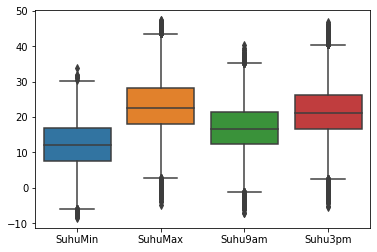

In [43]:
# Cek outlier pada feature suhu
plt.figure()
sns.boxplot(data=eks_df_replace_mv[['SuhuMin', 'SuhuMax', 'Suhu9am', 'Suhu3pm']])

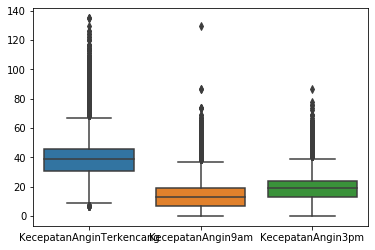

In [44]:
# Cek outlier pada feature kecepatan angin
plt.figure()
sns.boxplot(data=eks_df_replace_mv[['KecepatanAnginTerkencang','KecepatanAngin9am','KecepatanAngin3pm']], )

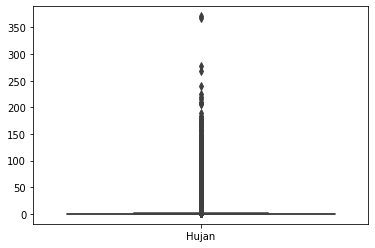

In [45]:
# Cek outlier pada feature hujan
plt.figure()
sns.boxplot(data=eks_df_replace_mv[['Hujan']])

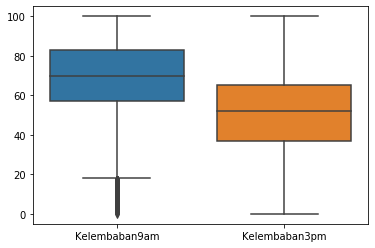

In [46]:
# Cek outlier pada fitur kelembaban
plt.figure()
sns.boxplot(data=eks_df_replace_mv[['Kelembaban9am','Kelembaban3pm']])

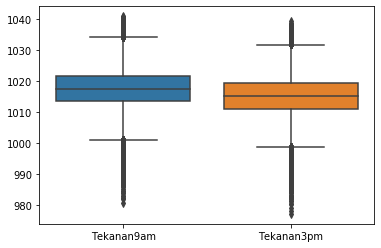

In [47]:
# Cek Outlier pada feature tekanan
plt.figure()
sns.boxplot(data=eks_df_replace_mv[['Tekanan9am','Tekanan3pm']])

In [48]:
# Handle Outlier dengan hanya mengambil data yang berada dalam suatu range, berdasarkan batasan berupa quartil
eks_outlier = eks_df_replace_mv

#Mencari batas atas dan batas bawah berdasarkan quartil
qmax_l = eks_outlier["SuhuMax"].quantile(0.01)
qmax_h  = eks_outlier["SuhuMax"].quantile(0.99)
qmin_l = eks_outlier["SuhuMin"].quantile(0.01)
qmin_h = eks_outlier["SuhuMin"].quantile(0.99)
q3_l = eks_outlier["Suhu3pm"].quantile(0.01)
q3_h = eks_outlier["Suhu3pm"].quantile(0.99)
q9_l = eks_outlier["Suhu9am"].quantile(0.01)
q9_h = eks_outlier["Suhu9am"].quantile(0.99)
ql_lembab = eks_outlier["Kelembaban9am"].quantile(0.01)
ql_t9 = eks_outlier["Tekanan9am"].quantile(0.01)
qh_t9 = eks_outlier["Tekanan9am"].quantile(0.99)
ql_t3 = eks_outlier["Tekanan3pm"].quantile(0.01)
qh_t3 = eks_outlier["Tekanan3pm"].quantile(0.99)
ql_ak = eks_outlier["KecepatanAnginTerkencang"].quantile(0.01)
qh_ak = eks_outlier["KecepatanAnginTerkencang"].quantile(0.99)
ql_a3 = eks_outlier["KecepatanAngin3pm"].quantile(0.01)
qh_a3 = eks_outlier["KecepatanAngin3pm"].quantile(0.99)
ql_a9 = eks_outlier["KecepatanAngin9am"].quantile(0.01)
qh_a9 = eks_outlier["KecepatanAngin9am"].quantile(0.99)
qh_hujan = eks_outlier["Hujan"].quantile(0.99)

# Seleksi data yang tidak termasuk outlier
eks_outlier = eks_outlier[((eks_outlier["SuhuMax"] < qmax_h)
                          & (eks_outlier["SuhuMax"] > qmax_l)
                          & (eks_outlier["SuhuMin"] < qmin_h)
                          & (eks_outlier["SuhuMin"] > qmin_l)
                          & (eks_outlier["Suhu9am"] < q9_h)
                          & (eks_outlier["Suhu9am"] > q9_l)                           
                          & (eks_outlier["Suhu3pm"] < q3_h)
                          & (eks_outlier["Suhu3pm"] > q3_l)                           
                          & (eks_outlier["Kelembaban9am"] > ql_lembab) 
                          & (eks_outlier["Tekanan9am"] < qh_t9)
                          & (eks_outlier["Tekanan9am"] > ql_t9)
                          & (eks_outlier["Tekanan3pm"] < qh_t3)
                          & (eks_outlier["Tekanan3pm"] > ql_t3)
                          & (eks_outlier["KecepatanAnginTerkencang"] > ql_ak) 
                          & (eks_outlier["KecepatanAnginTerkencang"] < qh_ak)
                          & (eks_outlier["KecepatanAngin3pm"] > ql_a3)
                          & (eks_outlier["KecepatanAngin3pm"] < qh_a3)
                          & (eks_outlier["KecepatanAngin9am"] > ql_a9)
                          & (eks_outlier["KecepatanAngin9am"] < qh_a9)
                          & (eks_outlier["Hujan"] < qh_hujan))
                         ]

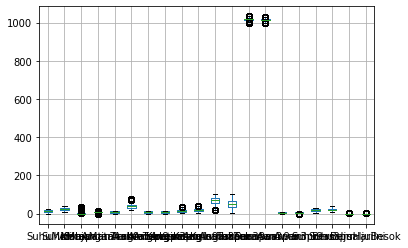

In [54]:
# Mengecek outlier dengan boxplot
eks_outlier.boxplot()

In [35]:
# Memisahkan input dan output untuk di train
# train_X = eks_outlier.drop('BersaljuBesok',axis=1)
# train_y = eks_outlier['BersaljuBesok']

#### Data test

(Data test tidak akan dipakai karena labelnya hanya 0)

In [ ]:
eks_test_replace_mv['BersaljuBesok'].value_counts()

In [ ]:
# prediksi pada data test
eks_test = data_test_salju
eks_test['BersaljuHariIni'] = (eks_test['BersaljuHariIni'] == 'Ya').astype(int)
eks_test['BersaljuBesok'] = (eks_test['BersaljuBesok'] == 'Ya').astype(int)

In [ ]:
# Menghapus kolom yang tidak akan digunakan dalam pemodelan
eks_test_drop = eks_test.copy()
eks_test_drop.drop(['Tanggal', 'KodeLokasi', 'Penguapan', 'SinarMatahari', 'Awan3pm'], axis=1, inplace=True)
eks_test_encode = pd.get_dummies(data=eks_test_drop, columns=['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'])
eks_test_encode = eks_test_drop
eks_test_encode['ArahAnginTerkencang'].fillna( method ='ffill', inplace = True)
eks_test_encode['ArahAngin9am'].fillna( method ='ffill', inplace = True)
eks_test_encode['ArahAngin3pm'].fillna( method ='ffill', inplace = True)
eks_test_encode['ArahAnginTerkencang'] = label_encoder.fit_transform(eks_test_encode['ArahAnginTerkencang'].astype(str))
eks_test_encode['ArahAngin9am'] = label_encoder.fit_transform(eks_test_encode['ArahAngin9am'].astype(str))
eks_test_encode['ArahAngin3pm'] = label_encoder.fit_transform(eks_test_encode['ArahAngin3pm'].astype(str))
eks_test_replace_mv = eks_test_encode.fillna(eks_test_encode.median())
# Handle Outlier pada feature yang korelasinya tinggi dengan BersaljuBesok
test_outlier = eks_test_replace_mv
Ql_lembab = test_outlier["Kelembaban9am"].quantile(0.01)
Ql_t9 = test_outlier["Tekanan9am"].quantile(0.01)
Qh_t9 = test_outlier["Tekanan9am"].quantile(0.99)
Ql_t3 = test_outlier["Tekanan3pm"].quantile(0.01)
Qh_t3 = test_outlier["Tekanan3pm"].quantile(0.99)
Ql_ak = test_outlier["KecepatanAnginTerkencang"].quantile(0.01)
Qh_ak = test_outlier["KecepatanAnginTerkencang"].quantile(0.99)
Ql_a3 = test_outlier["KecepatanAngin3pm"].quantile(0.01)
Qh_a3 = test_outlier["KecepatanAngin3pm"].quantile(0.99)
Ql_a9 = test_outlier["KecepatanAngin9am"].quantile(0.01)
Qh_a9 = test_outlier["KecepatanAngin9am"].quantile(0.99)
Qh_hujan = test_outlier["Hujan"].quantile(0.99)

test_outlier = test_outlier[((test_outlier["Kelembaban9am"] > Ql_lembab) 
                          & (test_outlier["Tekanan9am"] < Qh_t9)
                          & (test_outlier["Tekanan9am"] > Ql_t9)
                          & (test_outlier["Tekanan3pm"] < Qh_t3)
                          & (test_outlier["Tekanan3pm"] > Ql_t3)
                          & (test_outlier["KecepatanAnginTerkencang"] > Ql_ak) 
                          & (test_outlier["KecepatanAnginTerkencang"] < Qh_ak)
                          & (test_outlier["KecepatanAngin3pm"] > Ql_a3)
                          & (test_outlier["KecepatanAngin3pm"] < Qh_a3)
                          & (test_outlier["KecepatanAngin9am"] > Ql_a9)
                          & (test_outlier["KecepatanAngin9am"] < Qh_a9)
                          & (test_outlier["Hujan"] < qh_hujan))                             
                          ]

In [ ]:
#test_X = eks_test_replace_mv.drop('BersaljuBesok',axis=1)
#test_y = eks_test_replace_mv['BersaljuBesok']

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#test_X = scaler.fit_transform(test_X)

***

In [55]:
# Split data untuk test dan train
eks_X = eks_outlier.drop('BersaljuBesok',axis=1)
eks_y = eks_outlier['BersaljuBesok']

In [56]:
# Normalisasi data menggunakan metode Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X = scaler.fit_transform(eks_X)

In [57]:
train_X, test_X, train_y, test_y = train_test_split(eks_X, eks_y, test_size=0.20, random_state=27)

In [58]:
# Menampilkan jumlah baris dan kolom data test dan data train
print("X_train: ", train_X.shape)
print("y_train: ", train_y.shape)
print("X_test: ", test_X.shape)
print("y_test: ", test_y.shape)

X_train:  (72047, 19)
y_train:  (72047,)
X_test:  (18012, 19)
y_test:  (18012,)


### Pemodelan

In [ ]:
#model_knn = KNeighborsClassifier(n_neighbors=5)
#model_knn.fit(train_X, train_y)

In [59]:
# Import library untuk GridSearchCV
from sklearn.model_selection import GridSearchCV

# Mendefinisikan parameter yang akan diuji, berupa jumlah tetangga dan metode yang digunakan
k_range = list(range(10,31))
weight_options = ["distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

# Mencari parameter terbaik untuk pemodelan dengan GridSearchCV 
grid = GridSearchCV(knn, param_grid, n_jobs=-1, cv = 5, scoring = 'accuracy')
# Mealkukan pemodelan terhadap data train
grid.fit(train_X,train_y)

#Menampilkan skor dari CV yang terbaik
print (grid.best_score_)
# Menampilkan parameter yang menghasilkan skor terbaik
print (grid.best_params_)
# Menampilkan estimator yang menghasilkan skor terbaik
print (grid.best_estimator_)

0.8466556553361001
{'n_neighbors': 27, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')


In [60]:
# Memprediksi label pada data test dengan pemodelan berdasarkan estimator terbaik 
test_pred = grid.best_estimator_.predict(test_X)
test_pred

array([0, 1, 0, ..., 0, 0, 0])

### Evaluasi

In [61]:
# Menampilkan Accuracy score
print("Accuracy Score : {} %".format(int(accuracy_score(test_pred, test_y).round(2) * 100)))

# Menampilkan Confusion Matrix 
print(confusion_matrix(test_pred, test_y))

# Menampilkan Classification Report
print(classification_report(test_pred, test_y))

Accuracy Score : 85 %
[[13781  2110]
 [  562  1559]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     15891
           1       0.42      0.74      0.54      2121

    accuracy                           0.85     18012
   macro avg       0.69      0.80      0.73     18012
weighted avg       0.90      0.85      0.87     18012



## Conclusion

**Pada percobaan pertama :**
1. Preprocessing data: Remove Missing value, and Remove outlier. Split data 20% dari data train
2. Permodelan menggunakan KNN dengan n = 3
3. Evaluasi : Hasil Accuracy nya 75 %

**Pada percobaan kedua:**
1. Prepocessing data:
    - Handle missing value dengan median
    - Remove outlier dengan
    - Konversi terhadap feature categorical dengan encode label menjadi integer
    - Normalisasi dengan MinMax
2. Pemodelan menggunakan KNN yang dilakukan hyperparameter tuning menggunakan GridSearchCV 
3. Evaluasi :  Hasil Accuracy nya 85%
    
Berdasarkan kedua percobaan tersebut, 